In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
## Simple Constants

GREEN = (0,255,0)

# All the 6 methods for comparison in a list
# **NOTE** 
#    TM_CCORR didn't find image
#    all others did
METHODS = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

WORKSHEET = 'images/worksheet_with_empty_name.jpg'
WORKSHEET_WITH_NAME = 'images/worksheet_with_name.jpg'
WORKSHEET_NAME_LABEL = 'images/name_label.jpg'
WORKSHEET_NAME_AND_LINE = 'images/name_label_and_line.jpg'



In [3]:
# Load an color image in grayscale
worksheetImg = cv2.imread(WORKSHEET,0)
worksheetImg2 = cv2.imread(WORKSHEET)
worksheetWithNameImg = cv2.imread(WORKSHEET_WITH_NAME,0)
nameTemplate = cv2.imread(WORKSHEET_NAME_LABEL,0)
namePlusLineTemplate = cv2.imread(WORKSHEET_NAME_AND_LINE,0)

In [4]:

#plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#plt.show()

In [5]:
def findTemplate(image, template, borderColor, displayYN):

    w,h = template.shape[::-1]
    
    for meth in METHODS:
        img = image.copy()
        method = eval(meth)

        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        


        # Alter image to put green box around template
        
        # examle of adjusted coordinates: top_left = (0,0)
        #top_left = (0,0)
        cv2.rectangle(img,top_left, bottom_right, borderColor, 2)

        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)

        if displayYN:
            plt.show()

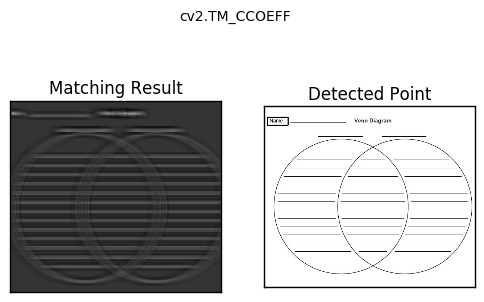

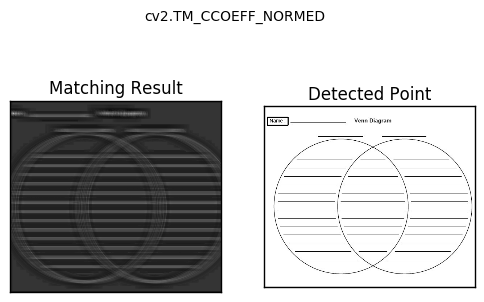

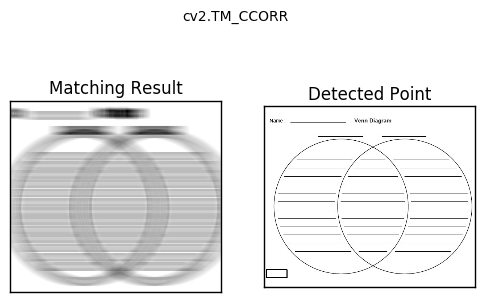

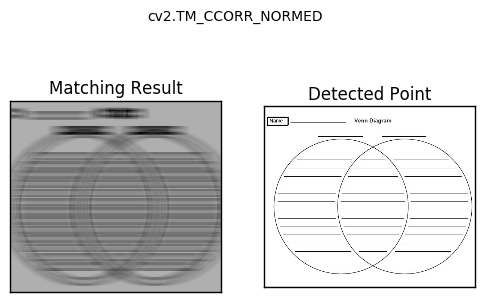

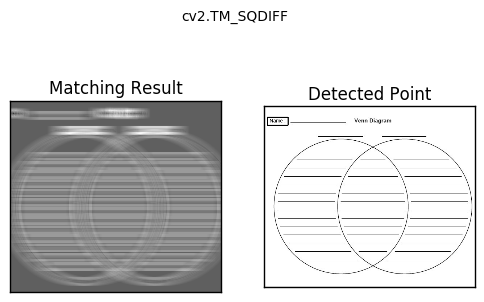

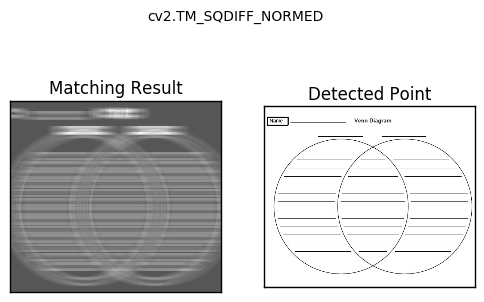

In [6]:
findTemplate(worksheetImg, nameTemplate, GREEN, True)

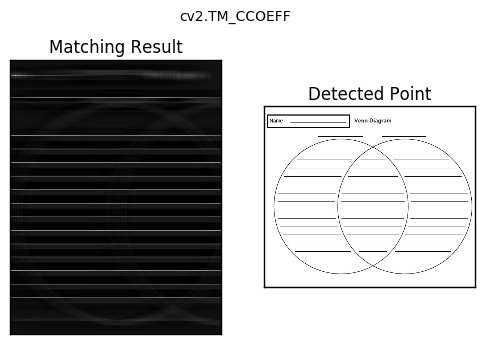

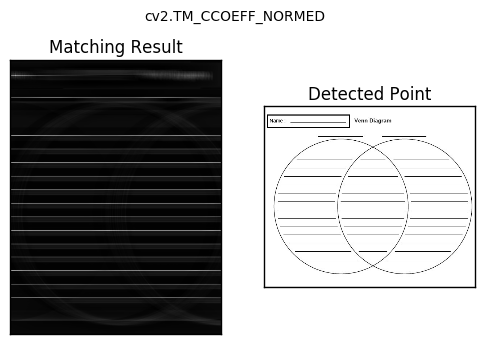

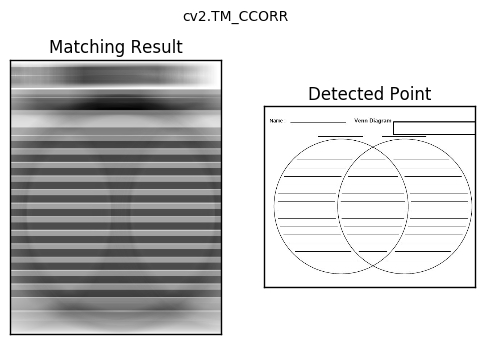

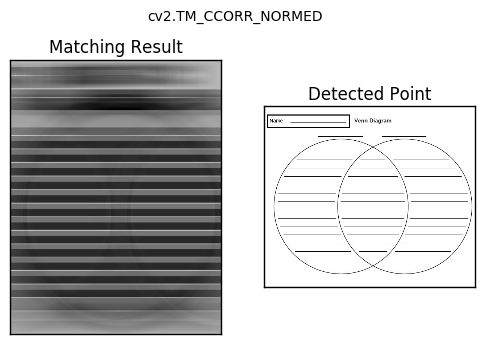

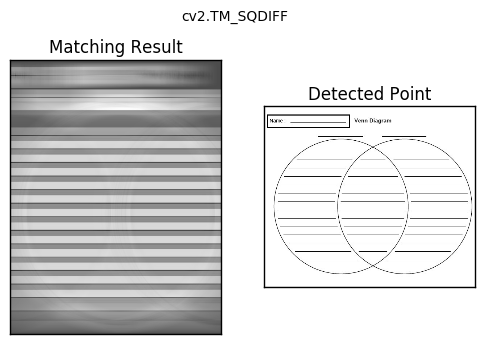

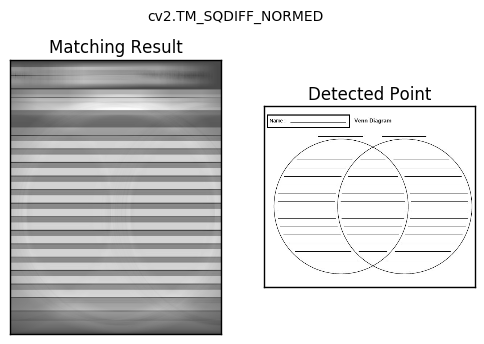

In [7]:
findTemplate(worksheetImg, namePlusLineTemplate, GREEN, True)

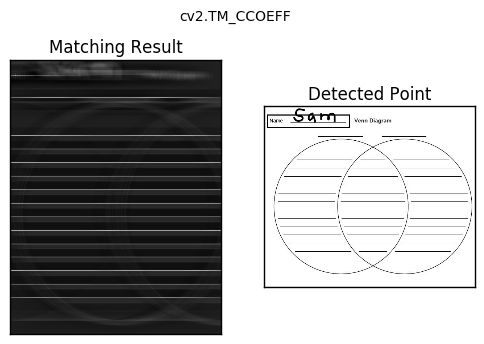

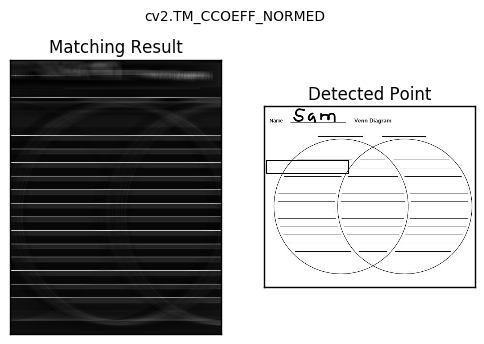

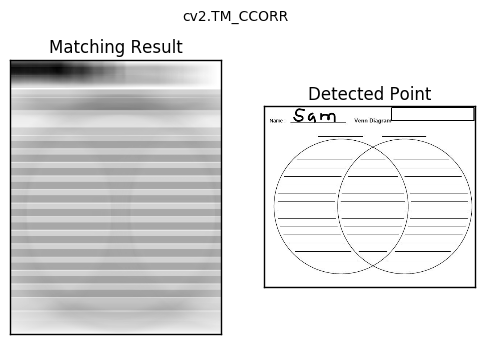

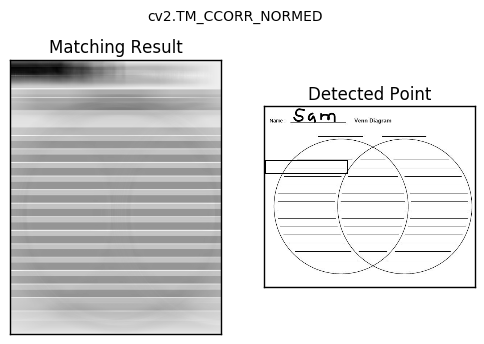

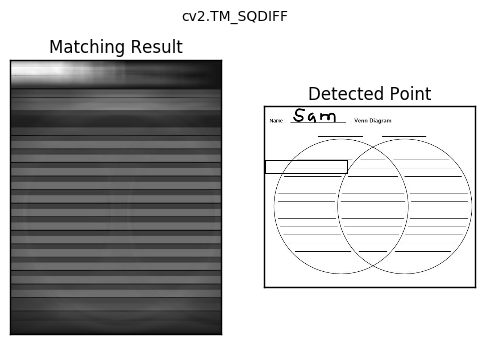

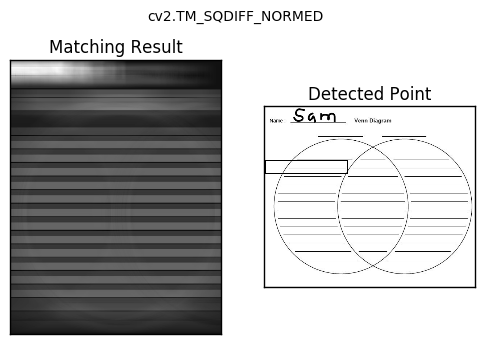

In [8]:
findTemplate(worksheetWithNameImg, namePlusLineTemplate, GREEN, True)

In [ ]:
def border_words(img):
    img_final = img
    img2gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
    image_final = cv2.bitwise_and(img2gray , img2gray , mask =  mask)
    ret, new_img = cv2.threshold(image_final, 180 , 255, cv2.THRESH_BINARY_INV)  # for black text , cv.THRESH_BINARY_INV
    '''
            line  8 to 12  : Remove noisy portion 
    '''
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3 , 3)) # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more 
    dilated = cv2.dilate(new_img,kernel,iterations = 9) # dilate , more the iteration more the dilation

    image_, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) # get contours
    index = 0 
    for contour in contours:
        # get rectangle bounding contour
        [x,y,w,h] = cv2.boundingRect(contour)

        #Don't plot small false positives that aren't text
        if w < 35 and h<35:
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)

        '''
        #you can crop image and send to OCR  , false detected will return no text :)
        cropped = img_final[y :y +  h , x : x + w]

        s = file_name + '/crop_' + str(index) + '.jpg' 
        cv2.imwrite(s , cropped)
        index = index + 1

        '''
    # write original image with added contours to disk  
    cv2.imshow('captcha_result2' , img)
    cv2.waitKey()

In [ ]:
border_words(worksheetImg2)